In [2]:
import matplotlib.pyplot as plt
import random
from typing import Literal
from typing import List

In [3]:
class Gambler:
    NotEnoughMoneyError = ValueError("gambler is out of money")
    HasReachedTargetError = ValueError("Gambler has reached target")
    GamblerHasMoreRoundError = ValueError("gambler has placed more bets")

    def __init__(
        self,
        name: str,
        initial_stack: int,
        bet_amount: int,
        win_probability: float,
        target_amount: int,
    ):
        self.name = name
        self.current_money = initial_stack
        self.bet_amount = bet_amount
        self.win_probability = win_probability
        self.target_amount = target_amount
        self.money_history = [initial_stack]

    def can_place_bet(self, raise_exception: bool = False):
        if not raise_exception:
            return 0 < self.current_money < self.target_amount

        if self.current_money <= 0:
            raise self.NotEnoughMoneyError
        if self.current_money >= self.target_amount:
            raise self.HasReachedTargetError

    def bet(self) -> float:
        self.can_place_bet(raise_exception=True)
        p = random.random()
        if p < self.win_probability:
            self.current_money += self.bet_amount
        else:
            self.current_money -= self.bet_amount
        self.money_history.append(self.current_money)
        return self.current_money

    def reset_money(self):
        money = self.money_history[0]
        self.current_money = money
        self.money_history = [money]

In [4]:
def place_bet_for_gamblers(gamblers: List[Gambler], round_count: int):
    for _ in range(round_count):
        for gambler in gamblers:
            if gambler.can_place_bet():
                gambler.bet()


def calc_prob(
    gambler: Gambler, n: int, max_round: int, return_value: Literal["s"]
) -> List[float]:
    random.seed(42)
    money_history = [0] * (max_round + 1)
    moneys = []
    for _ in range(n):
        gambler.reset_money()
        money_history[0] += gambler.current_money
        moneys.append([gambler.current_money])
        for _ in range(max_round):
            if gambler.can_place_bet():
                gambler.bet()
            moneys[-1].append(gambler.current_money)

    match return_value:
        case "average":
            ans = [0] * (max_round + 1)
            for money in moneys:
                for i in range(len(ans)):
                    ans[i] += money[i]
            return [i / len(moneys) for i in ans]

        case "plot":
            draw_plot(moneys=moneys, labels=None, n=max_round + 1)
        case "all":
            return moneys
        case "last":
            return [i[-1] for i in moneys]
        case "prob":
            win = sum(1 for i in moneys if i[-1] == gambler.target_amount) / n
            lose = sum(1 for i in moneys if i[-1] <= 0) / n
            return (win, lose)
        case _:
            raise ValueError(f"Unknown return value {return_value}")


def draw_plot(moneys: List[List[float]], labels: List[str], n: int):
    x = range(n)
    if not labels:
        labels = [None] * len(moneys)
    assert len(moneys) == len(labels)
    for i in range(len(moneys)):
        y = moneys[i].copy()
        y += [y[-1]] * (n - len(y))  # pad y
        plt.plot(x, y, label=labels[i])
    plt.legend()
    plt.show()

In [5]:
gamblers = [
    Gambler(
        name="p 0.3",
        initial_stack=1000,
        bet_amount=10,
        win_probability=0.3,
        target_amount=2000,
    ),
    Gambler(
        name="normal",
        initial_stack=1000,
        bet_amount=10,
        win_probability=0.5,
        target_amount=2000,
    ),
    Gambler(
        name="p 0.55",
        initial_stack=1000,
        bet_amount=10,
        win_probability=0.55,
        target_amount=2000,
    ),
    Gambler(
        name="p 0.7",
        initial_stack=1000,
        bet_amount=10,
        win_probability=0.7,
        target_amount=2000,
    ),
    Gambler(
        name="p 0.9",
        initial_stack=1000,
        bet_amount=10,
        win_probability=0.9,
        target_amount=2000,
    ),
    Gambler(
        name="bet 20",
        initial_stack=1000,
        bet_amount=100,
        win_probability=0.5,
        target_amount=2000,
    ),
    Gambler(
        name="bet 100",
        initial_stack=1000,
        bet_amount=100,
        win_probability=0.5,
        target_amount=2000,
    ),
]

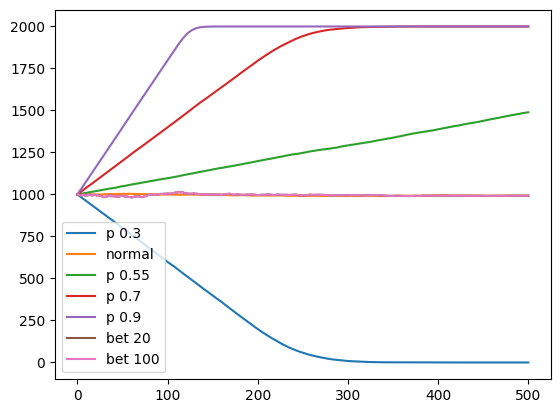

In [6]:
round_count = 500
gambler_count = 1000
moneys = [
    calc_prob(gambler, gambler_count, round_count, return_value="average")
    for gambler in gamblers
]
draw_plot(moneys, [i.name for i in gamblers], round_count + 1)

/var/folders/0m/wjwgxmxs2xl1pdp5hqg8qgr00000gn/T/ipykernel_1186/4160884623.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


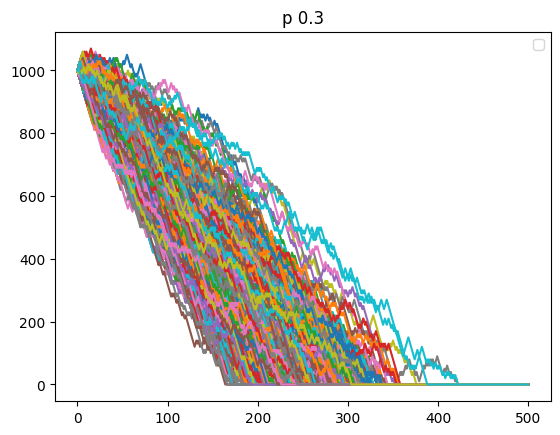

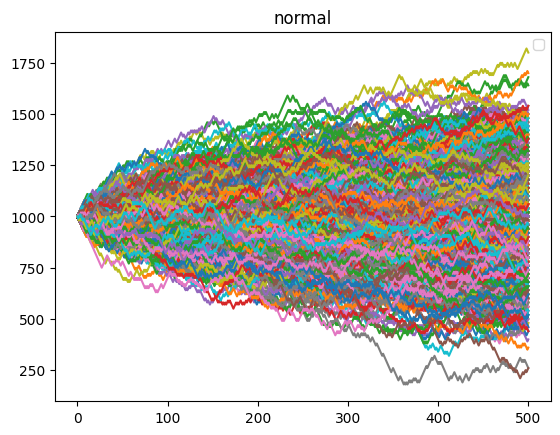

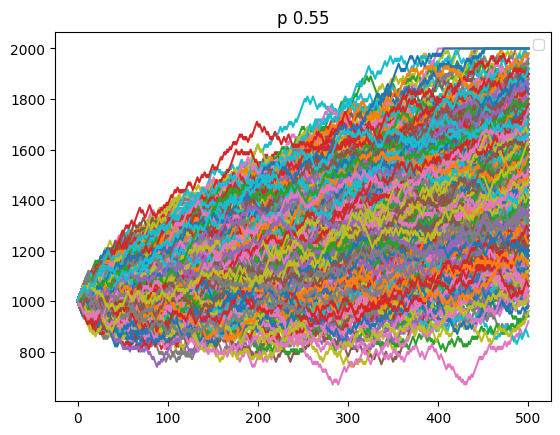

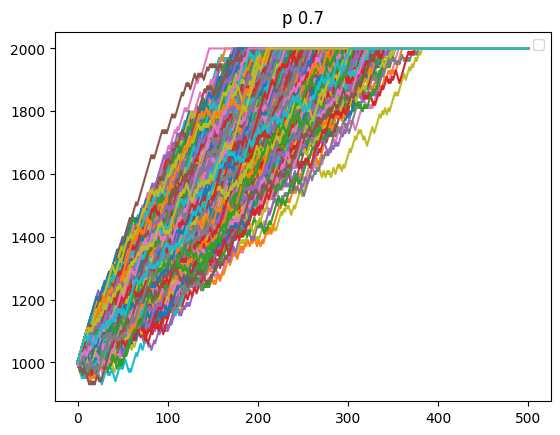

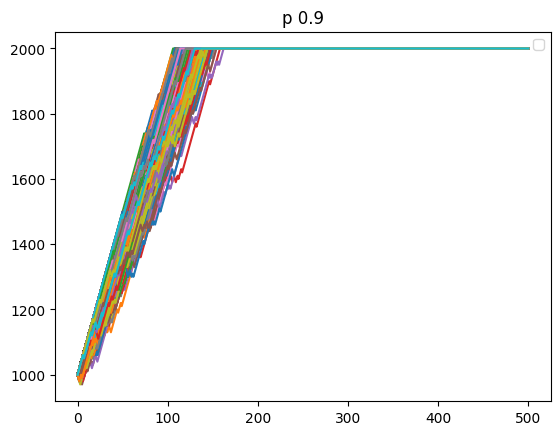

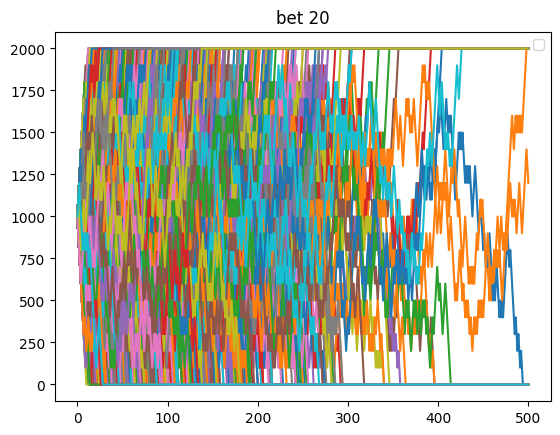

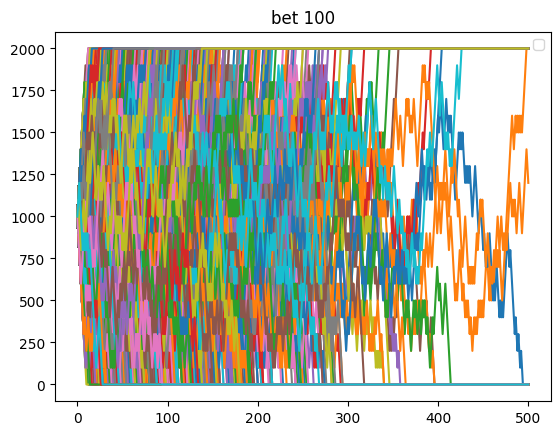

In [7]:
for gambler in gamblers:
    plt.title(gambler.name)
    calc_prob(gambler, gambler_count, round_count, return_value="plot")

In [8]:
for gambler in gamblers:
    print(f"Gambler {gambler.name}:")
    win, lose = calc_prob(gambler, gambler_count, round_count, return_value="prob")
    print(f"\t Win probability: {win}")
    print(f"\t Lose probability: {lose}")

Gambler p 0.3:
	 Win probability: 0.0
	 Lose probability: 1.0
Gambler normal:
	 Win probability: 0.0
	 Lose probability: 0.0
Gambler p 0.55:
	 Win probability: 0.01
	 Lose probability: 0.0
Gambler p 0.7:
	 Win probability: 1.0
	 Lose probability: 0.0
Gambler p 0.9:
	 Win probability: 1.0
	 Lose probability: 0.0
Gambler bet 20:
	 Win probability: 0.496
	 Lose probability: 0.503
Gambler bet 100:
	 Win probability: 0.496
	 Lose probability: 0.503


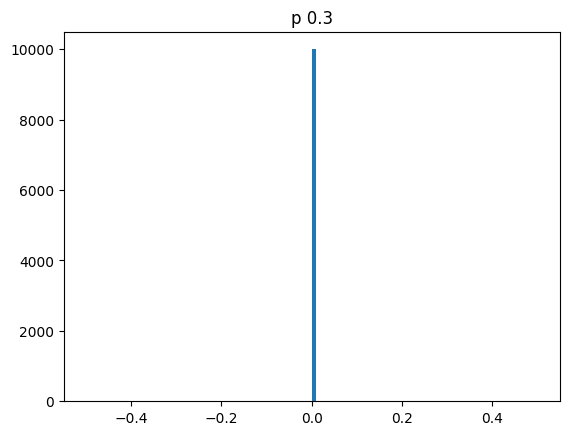

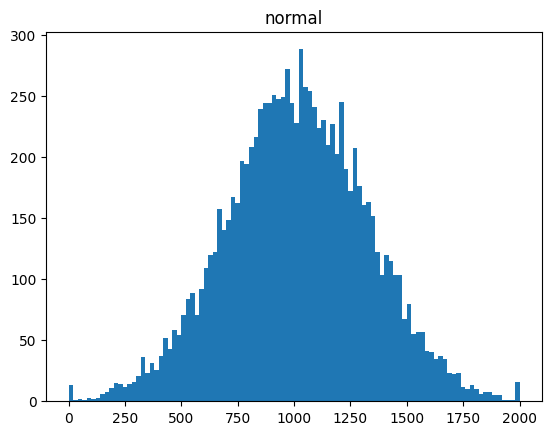

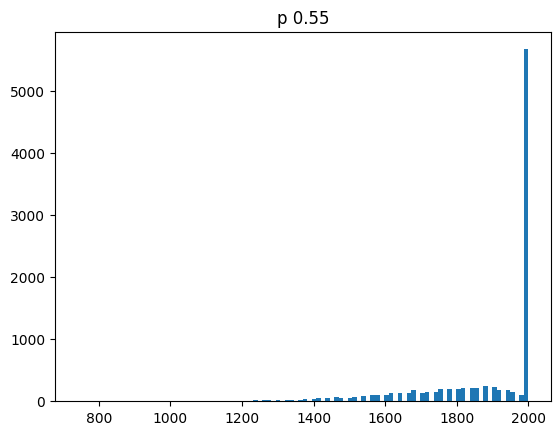

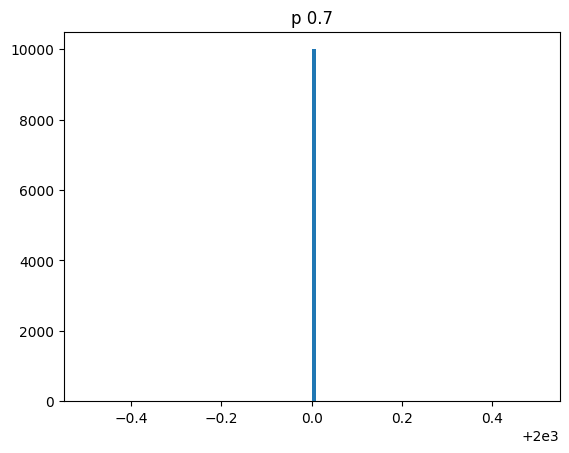

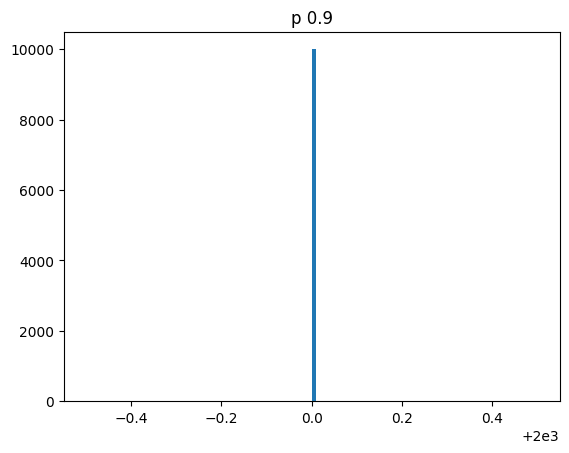

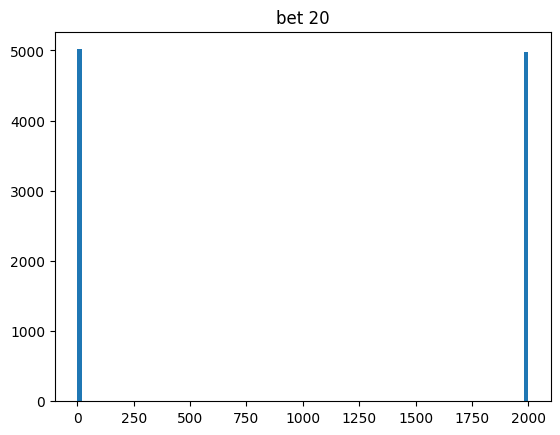

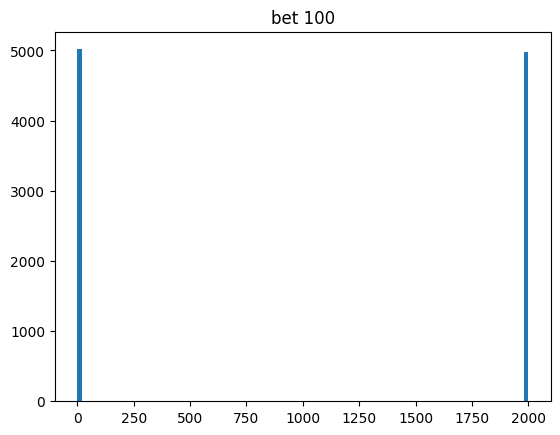

In [9]:
for gambler in gamblers:
    moneys = calc_prob(gambler=gambler, n=10000, max_round=1000, return_value="last")
    plt.hist(moneys, bins=100)
    plt.title(gambler.name)
    plt.show()
print()